# Exploratory Data Analysis

 We first focus on exploring the data, exploratory data analysis (EDA). Data comes from many sources: sensor measurement, events, text, images, and videos.

Data types: continuous, discrete, categorical, binary, ordinal.

Two types of structured data: numeric and categorical (fix set of values, e.g. binary data)  
Data typing in software acts as a signal to the software on how to process the data.
Rectangular data (basic data structure): two-dimensional matrix with rows indicating records (cases) and columns indicating features (variables)
In Python, with the pandas library, the basic rectangular data structure is a DataFrame object. 

Nonrectangular data structures: time series, spatial data structures, graphs (depiction of the connections among entities)

Terminology can be confusing, there are a variety of synonyms arising from the different disciplines that contribute to data science (statistics, computer science, and information technology)



## 1. Estimates of location

Variables with measured or count data might have thousands of distinct values. A basic step in exploring your data is getting a "typical value" for each feature: an estimate of where most of the data is located (i.e. its central tendency) which we refer to as a metric (statisticians refer to as estimates). The common metrics are: mean, weighted mean, median, weighted median, trimmed mean, robust, outlier.

Weighted mean is used when 1) some values are intrinsically more variable than others, and highly variable observations are given a lower weight. 2) the data collected does not equally represent the different groups that we are interested in measuring.
 
Trimmed mean is calculated by dropping a fixed number of sorted values at each end and then taking an average of the remaining values.

Compared to the mean, which uses all observations, the median depends only on the values in the center of the sorted data. Since the mean is much more sensitive the data, there are many instances in which the median is a better metric for location. 

The median is refered to as a robust estimate of location since it is not influenced by outliers (extreme cases) that could skew the results. An outlier is any value that is very distant from the other values in a dataset. Being an outlier in itself does not make a data value invalid or erroneous (as in the example with Bill Gates). Still, outliers are often the result of data errors such as mixing data of different units (kilometers versus meters) or bad readings from a sensor. When outliers are the result of bad data, the mean will result in a poor estimate of location, while the median will be still be valid. In any case, outliers should be identified and are usually worthy of further investigation.

The median is not the only robust estimate of location. In fact, a trimmed mean is widely used to avoid the influence of outliers. The trimmed mean can be thought of as a compromise between the median and the mean: it is robust to extreme values in the data, but uses more data to calculate the estimate for location.

Like the median, the weighted median is robust to outliers.

### Example: Location Estimates of Population and Murder Rates

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from scipy.stats import trim_mean
from matplotlib import pyplot as plt
from statsmodels import robust

import wquantiles

In [9]:
DATA = Path().resolve() / 'data'
DATA

PosixPath('/Users/zhiwei/Documents/DSprojects/statistics/data')

In [12]:
# Define paths to dataset

AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

In [24]:
state = pd.read_csv(STATE_CSV)
state.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [26]:
# Mean, median, and trimmed mean

print(int(state['Population'].mean()))
print(int(state['Population'].median()))
print(int(trim_mean(state['Population'], 0.1)))

6162876
4436369
4783697


In [31]:
# average murder rate, weighted mean murder rate

print(state['Murder.Rate'].mean())
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.066
4.445833981123393


In [33]:
# weighted median

print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


## 2. Estimates of Variability

Variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

Key terms:

Deviations: the difference between the observed values and the estimate of location.  
Variance: the sum of squared deviations from the mean divided by n – 1 where n is the number of data values.  
Standard deviation: the square root of the variance.  
Mean absolute deviation: the mean of the absolute value of the deviations from the mean.  
Median absolute deviation from the median: the median of the absolute value of the deviations from the median.  
Range: the difference between the largest and the smallest value in a dataset.  
Order statistics: metrics based on the data values sorted from smallest to biggest.  
Percentile: the value such that P percent of the values take on this value or less and (100–P) percent take on this value or more.  
Interquartile range: the difference between the 75th percentile and the 25th percentile.

If you divide by n – 1 instead of n, the standard deviation becomes an unbiased estimate.  
The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.

Estimate based on percentiles: the most basic measure is the range.  
To avoid the sensitivity to outliers, we can look at the range of the data after dropping values from each end. Formally, these types of estimates are based on differences between percentiles.  
A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the interquartile range (or IQR).

### Example: Variability Estimates of State Population

In [37]:
state['Population'].describe()

count    5.000000e+01
mean     6.162876e+06
std      6.848235e+06
min      5.636260e+05
25%      1.833004e+06
50%      4.436370e+06
75%      6.680312e+06
max      3.725396e+07
Name: Population, dtype: float64

In [41]:
# IQR

print(state['Population'].describe()['75%'] - state['Population'].describe()['25%'])
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0
4847308.0


In [44]:
# MAD (median absolution deviation from the median)

print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


The variance and standard deviation are the most widespread and routinely reported statistics of variability.  
Both are sensitive to outliers.  
More robust metrics include mean and median absolute deviations from the mean and percentiles (quantiles).

## 3. Exploring the Data Distribution

Key terms for exploring the distribution:

Boxplot: a quick way to visualize the distribution of data.  
Frequency table:  a tally of the count of numeric data values that fall into a set of intervals (bins).  
Histogram: a plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis.  
Density plot: a smoothed version of the histogram, often based on a kernal density estimate

In [45]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [46]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


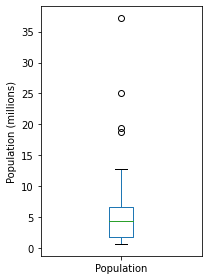

In [49]:
# Boxplot of state populations

ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The dashed lines, referred to as whiskers, extend from the top and bottom to indicate the range for the bulk of the data.

The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.

In [50]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


In [53]:
# Table 1.5: a frequency table of populatin by state

binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

Both frequency tables and percentiles summarize the data by creating bins. In general, quartiles and deciles will have the same count in each bin(equal-count bins), but the bin sizes will be different. The frequency table, by contrast, will have different counts in the bins (equal-size bins).

Text(0.5, 0, 'Population (millions)')

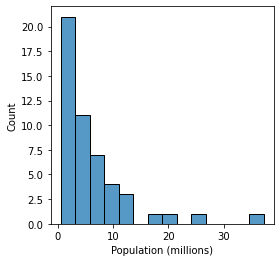

In [66]:
# Figure 1-3. Histogram of state populations

plt.figure(figsize=(4,4))
ax = sns.histplot(state['Population']/1_000_000)
ax.set_xlabel('Population (millions)')

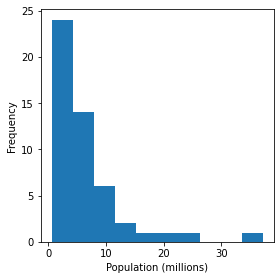

In [59]:
# Figure 1-3. Histogram of state populations

ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. Skewness refers to whether the data is skewed to larger or smaller values and kurtosis indicates the propensity of the
data to have extreme values. Generally, metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays such as Figures 1-2 and 1-3.

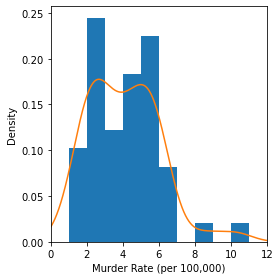

In [73]:
# Density plot 

ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1,12), figsize=(4, 4))
# ax = sns.histplot(state['Murder.Rate'])
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()

Key ideas:

A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.  
A frequency table is a tabular version of the frequency counts found in a histogram.  
A boxplot — with the top and bottom of the box at the 75th and 25th percentiles, respectively — also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.  
A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).  

## 4. Exploring Binary and Categorical Data

Key terms:

Mode: the most commonly occurring category or value in a data set.  
Expected value: when the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.  
Bar chart: the frequency or proportion for each category plotted as bars.  
Pie chart: the frequency or proportion for each category plotted as wedges in a pie.

In [77]:
# the percentage of delayed flights by the cause of delay at Dallas/Fort Worth airport since 2010

dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [80]:
100 * dfw / dfw.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


In [83]:
# dfw.plot.bar()

Text(0, 0.5, 'Count')

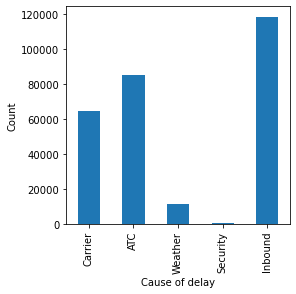

In [82]:
# Figure 1-5. Bar plot airline delays at DFW by cause

ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents `different categories` of a factor variable, while in a histogram the x-axis represents values of a `single` variable on a numeric scale. In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.

In “Frequency Table and Histograms”, we looked at frequency tables based on binning the data. This implicitly converts the numeric data to an ordered factor. In this sense, histograms and bar charts are similar, except that the categories on the x-axis in the bar chart are `not ordered`. Converting numeric data to categorical data is an important and widely used step in data analysis since it reduces the complexity (and size) of the data. This aids in the discovery of relationships between features, particularly at the initial stages of an analysis.

The mode is the value — or values in case of a tie — that appears most often in the data. For example, the mode of the cause of delay at Dallas/Fort Worth airport is “Inbound.” The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.

Key ideas:

Categorical data is typically summed up in proportions, and can be visualized in a bar chart.  
Categories might represent distinct things (apples and oranges, male and female), levels of a factor variable (low, medium, and high), or _numeric data that has been binned_.  
Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels.

## 5. Correlation

Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable. Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

Key terms:

Correlation coefficient: A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).  
Correlation matrix: A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.  
Scatterplot: A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

In [84]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [86]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
# telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [87]:
# funds traded on major exchanges (sector == 'etf'). 

etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


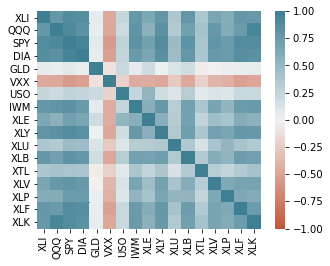

In [88]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

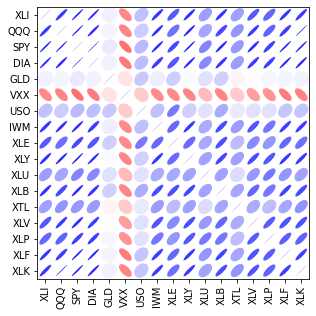

In [98]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 5), cmap='bwr_r')
# fig.colorbar(m)
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient') #TODO display colorbar

Statisticians have long ago proposed other types of correlation coefficients, such as Spearman’s rho or Kendall’s tau. These are correlation coefficients based on the rank of the data. Since they work with ranks rather than values, these estimates are robust to outliers and can handle certain types of nonlinearities. However, data scientists can generally stick to Pearson’s correlation coefficient, and its robust alternatives, for exploratory analysis. The appeal of rankbased estimates is mostly for smaller data sets and specific hypothesis tests.

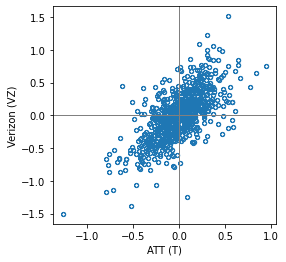

In [101]:
# Scatterplot

ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

Key ideas:

The correlation coefficient measures the extent to which two variables are associated with one another.  
When high values of v1 go with high values of v2, v1 and v2 are positively associated.  
When high values of v1 are associated with low values of v2, v1 and v2 are negatively associated.  
The correlation coefficient is a standardized metric so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).  
A correlation coefficient of 0 indicates no correlation, but be aware that random arrangements of data will produce both positive and negative values for the correlation coefficient just by chance.  

# 6. Exploring Two or More Variables

Key terms:

Contingency tables: A tally of counts between two or more categorical variables.  
Hexagonal binning: A plot of two numeric variables with the records binned into hexagons.  
Contour plots: A plot showing the density of two numeric variables like a topographical map.  
Violin plots: Similar to a boxplot but showing the density estimate.

In [102]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

Text(0, 0.5, 'Tax Assessed Value')

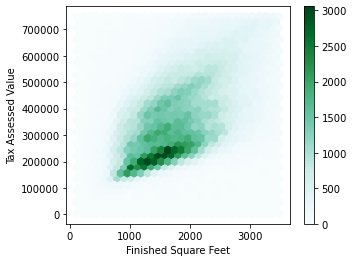

In [103]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

Text(0, 0.5, 'Tax Assessed Value')

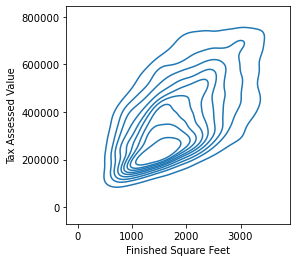

In [104]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

In [105]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [106]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [107]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


Text(0.5, 0.98, '')

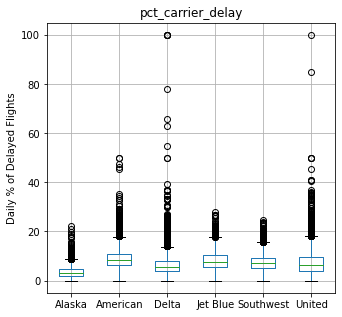

In [108]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

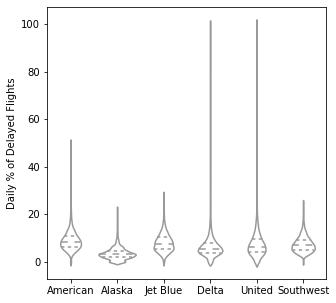

In [109]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

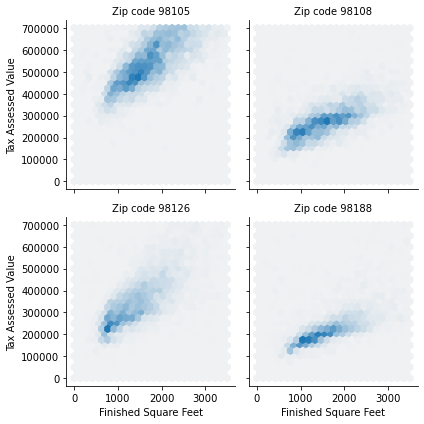

In [110]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

Key ideas:

Hexagonal binning and contour plots are useful tools that permit graphical examination of two numeric variables at a time, without being overwhelmed by huge amounts of data.  
Contingency tables are the standard tool for looking at the counts of two categorical variables.  
Boxplots and violin plots allow you to plot a numeric variable against a categorical variable.

## Summary

With the development of exploratory data analysis (EDA), statistics set a foundation that was a precursor to the field of data science. The key idea of EDA is that the first and most important step in any project based on data is to _look at the data_. By summarizing and visualizing the data, you can gain valuable intuition and understanding of the project.

This chapter has reviewed concepts ranging from simple metrics, such as estimates of location and variability, to rich visual displays to explore the relationships between multiple variables, as in Figure 1-12. The diverse set of tools and techniques being developed by the open source community, combined with the expressiveness of the R and Python languages, has created a plethora of ways to explore and analyze data. Exploratory analysis should be a cornerstone of any data science project.